## Regression

In [1]:
import time
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lvxnn.LVXNN import LV_XNN
from sklearn.metrics.pairwise import cosine_similarity
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization
from sklearn.linear_model import LinearRegression
from lvxnn.DataReader import data_initialize
from collections import OrderedDict

In [2]:
data= pd.read_csv('data/simulation/sim_0.9.csv')
train , test = train_test_split(data,test_size=0.2)

#list1 = data.columns
meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
#meta_info['Occupation']={"type":"categorical"}
#meta_info['Genres']={"type":"categorical"}
#meta_info['Gender']={"type":"categorical"}
#meta_info['Age'] = {"type":"continues"}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


tr_x, tr_Xi, tr_y , te_x , te_Xi, te_y, meta_info, model_info = data_initialize(train,test,meta_info,"Regression")

In [3]:
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=True,
               interaction_epochs=200,main_effect_epochs=300,tuning_epochs=50,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0.5,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=10,i_group_num=20,scale_ratio=0.7,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=300,mf_tuning_iters=100,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20)

In [4]:
st_time = time.time()
model.fit(tr_x,tr_Xi, tr_y)
ed_time = time.time()

ListWrapper(['uf_1', 'uf_2', 'uf_3', 'uf_4', 'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 4.01798, val loss: 4.00104
Main effects training epoch: 2, train loss: 3.84782, val loss: 3.84499
Main effects training epoch: 3, train loss: 3.64215, val loss: 3.64101
Main effects training epoch: 4, train loss: 3.48702, val loss: 3.45978
Main effects training epoch: 5, train loss: 3.33219, val loss: 3.27733
Main effects training epoch: 6, train loss: 3.34254, val loss: 3.28599
Main effects training epoch: 7, train loss: 3.31131, val loss: 3.25460
Main effects training epoch: 8, train loss: 3.27174, val loss: 3.21712
Main effects training epoch: 9, train loss: 3.22239, val loss: 3.17803
Main effects training epoch: 10, train loss: 3.10606, val loss: 3.06369
Main effects training epoch: 11, train loss: 3.08338, val loss: 3.03927
M

Main effects training epoch: 118, train loss: 1.62855, val loss: 1.60025
Main effects training epoch: 119, train loss: 1.62695, val loss: 1.59731
Main effects training epoch: 120, train loss: 1.62443, val loss: 1.59469
Main effects training epoch: 121, train loss: 1.62701, val loss: 1.59884
Main effects training epoch: 122, train loss: 1.62288, val loss: 1.59268
Main effects training epoch: 123, train loss: 1.62311, val loss: 1.59403
Main effects training epoch: 124, train loss: 1.62408, val loss: 1.59623
Main effects training epoch: 125, train loss: 1.62441, val loss: 1.59899
Main effects training epoch: 126, train loss: 1.62960, val loss: 1.59827
Main effects training epoch: 127, train loss: 1.62200, val loss: 1.59152
Main effects training epoch: 128, train loss: 1.62193, val loss: 1.59386
Main effects training epoch: 129, train loss: 1.63047, val loss: 1.60284
Main effects training epoch: 130, train loss: 1.61950, val loss: 1.58739
Main effects training epoch: 131, train loss: 1.621

Main effects training epoch: 234, train loss: 1.53233, val loss: 1.53961
Main effects training epoch: 235, train loss: 1.52891, val loss: 1.53553
Main effects training epoch: 236, train loss: 1.54018, val loss: 1.54080
Main effects training epoch: 237, train loss: 1.52919, val loss: 1.53670
Main effects training epoch: 238, train loss: 1.53859, val loss: 1.53915
Main effects training epoch: 239, train loss: 1.52868, val loss: 1.53679
Main effects training epoch: 240, train loss: 1.54678, val loss: 1.54661
Main effects training epoch: 241, train loss: 1.53092, val loss: 1.53384
Main effects training epoch: 242, train loss: 1.53314, val loss: 1.53884
Main effects training epoch: 243, train loss: 1.52657, val loss: 1.52614
Main effects training epoch: 244, train loss: 1.53568, val loss: 1.55362
Main effects training epoch: 245, train loss: 1.52497, val loss: 1.52378
Main effects training epoch: 246, train loss: 1.52562, val loss: 1.53217
Main effects training epoch: 247, train loss: 1.523

Main effects tuning epoch: 47, train loss: 1.46718, val loss: 1.48588
Main effects tuning epoch: 48, train loss: 1.47601, val loss: 1.49979
Main effects tuning epoch: 49, train loss: 1.47800, val loss: 1.48748
Main effects tuning epoch: 50, train loss: 1.46877, val loss: 1.47921
##########Stage 2: interaction training start.##########
Interaction training epoch: 1, train loss: 1.42737, val loss: 1.42257
Interaction training epoch: 2, train loss: 1.33411, val loss: 1.35999
Interaction training epoch: 3, train loss: 1.07325, val loss: 1.10781
Interaction training epoch: 4, train loss: 1.03445, val loss: 1.06884
Interaction training epoch: 5, train loss: 1.01246, val loss: 1.07140
Interaction training epoch: 6, train loss: 1.00771, val loss: 1.04470
Interaction training epoch: 7, train loss: 1.03732, val loss: 1.07695
Interaction training epoch: 8, train loss: 0.97234, val loss: 1.03324
Interaction training epoch: 9, train loss: 0.95252, val loss: 1.01481
Interaction training epoch: 10, t

Interaction training epoch: 113, train loss: 0.79359, val loss: 0.86002
Interaction training epoch: 114, train loss: 0.79669, val loss: 0.86043
Interaction training epoch: 115, train loss: 0.78811, val loss: 0.84475
Interaction training epoch: 116, train loss: 0.78929, val loss: 0.86400
Interaction training epoch: 117, train loss: 0.79226, val loss: 0.84429
Interaction training epoch: 118, train loss: 0.77728, val loss: 0.84073
Interaction training epoch: 119, train loss: 0.78328, val loss: 0.85541
Interaction training epoch: 120, train loss: 0.77947, val loss: 0.84511
Interaction training epoch: 121, train loss: 0.78946, val loss: 0.86167
Interaction training epoch: 122, train loss: 0.78108, val loss: 0.84387
Interaction training epoch: 123, train loss: 0.78255, val loss: 0.84101
Interaction training epoch: 124, train loss: 0.78547, val loss: 0.85528
Interaction training epoch: 125, train loss: 0.80175, val loss: 0.87135
Interaction training epoch: 126, train loss: 0.78722, val loss: 

Interaction tuning epoch: 27, train loss: 0.76792, val loss: 0.83306
Interaction tuning epoch: 28, train loss: 0.76682, val loss: 0.83392
Interaction tuning epoch: 29, train loss: 0.76393, val loss: 0.82255
Interaction tuning epoch: 30, train loss: 0.77113, val loss: 0.83944
Interaction tuning epoch: 31, train loss: 0.76793, val loss: 0.83235
Interaction tuning epoch: 32, train loss: 0.76789, val loss: 0.82536
Interaction tuning epoch: 33, train loss: 0.77475, val loss: 0.83688
Interaction tuning epoch: 34, train loss: 0.79028, val loss: 0.85342
Interaction tuning epoch: 35, train loss: 0.76853, val loss: 0.82478
Interaction tuning epoch: 36, train loss: 0.78397, val loss: 0.84595
Interaction tuning epoch: 37, train loss: 0.77109, val loss: 0.83671
Interaction tuning epoch: 38, train loss: 0.76541, val loss: 0.82224
Interaction tuning epoch: 39, train loss: 0.77558, val loss: 0.83889
Interaction tuning epoch: 40, train loss: 0.77223, val loss: 0.83266
Interaction tuning epoch: 41, trai

[SoftImpute] Iter 88: observed MAE=0.307443 validation MAE=0.588248,rank=3
[SoftImpute] Iter 89: observed MAE=0.306957 validation MAE=0.587818,rank=3
[SoftImpute] Iter 90: observed MAE=0.306477 validation MAE=0.587393,rank=3
[SoftImpute] Iter 91: observed MAE=0.306002 validation MAE=0.586963,rank=3
[SoftImpute] Iter 92: observed MAE=0.305535 validation MAE=0.586542,rank=3
[SoftImpute] Iter 93: observed MAE=0.305073 validation MAE=0.586124,rank=3
[SoftImpute] Iter 94: observed MAE=0.304622 validation MAE=0.585707,rank=3
[SoftImpute] Iter 95: observed MAE=0.304177 validation MAE=0.585305,rank=3
[SoftImpute] Iter 96: observed MAE=0.303737 validation MAE=0.584902,rank=3
[SoftImpute] Iter 97: observed MAE=0.303305 validation MAE=0.584491,rank=3
[SoftImpute] Iter 98: observed MAE=0.302887 validation MAE=0.584075,rank=3
[SoftImpute] Iter 99: observed MAE=0.302480 validation MAE=0.583653,rank=3
[SoftImpute] Iter 100: observed MAE=0.302081 validation MAE=0.583225,rank=3
[SoftImpute] Iter 101: o

[SoftImpute] Iter 196: observed MAE=0.279551 validation MAE=0.557208,rank=3
[SoftImpute] Iter 197: observed MAE=0.279389 validation MAE=0.556993,rank=3
[SoftImpute] Iter 198: observed MAE=0.279228 validation MAE=0.556777,rank=3
[SoftImpute] Iter 199: observed MAE=0.279067 validation MAE=0.556560,rank=3
[SoftImpute] Iter 200: observed MAE=0.278906 validation MAE=0.556346,rank=3
[SoftImpute] Iter 201: observed MAE=0.278745 validation MAE=0.556129,rank=3
[SoftImpute] Iter 202: observed MAE=0.278586 validation MAE=0.555910,rank=3
[SoftImpute] Iter 203: observed MAE=0.278428 validation MAE=0.555689,rank=3
[SoftImpute] Iter 204: observed MAE=0.278271 validation MAE=0.555465,rank=3
[SoftImpute] Iter 205: observed MAE=0.278117 validation MAE=0.555238,rank=3
[SoftImpute] Iter 206: observed MAE=0.277963 validation MAE=0.555013,rank=3
[SoftImpute] Iter 207: observed MAE=0.277812 validation MAE=0.554787,rank=3
[SoftImpute] Iter 208: observed MAE=0.277660 validation MAE=0.554558,rank=3
[SoftImpute]

[SoftImpute] Iter 5: observed MAE=0.384760 validation MAE=0.565366,rank=3
[SoftImpute] Iter 6: observed MAE=0.387646 validation MAE=0.568527,rank=3
[SoftImpute] Iter 7: observed MAE=0.386135 validation MAE=0.565675,rank=3
[SoftImpute] Iter 8: observed MAE=0.387031 validation MAE=0.568101,rank=3
[SoftImpute] Iter 9: observed MAE=0.387480 validation MAE=0.568650,rank=3
[SoftImpute] Iter 10: observed MAE=0.388029 validation MAE=0.571259,rank=3
[SoftImpute] Iter 11: observed MAE=0.383154 validation MAE=0.567393,rank=3
[SoftImpute] Iter 12: observed MAE=0.381716 validation MAE=0.568651,rank=3
[SoftImpute] Iter 13: observed MAE=0.380569 validation MAE=0.564649,rank=3
[SoftImpute] Iter 14: observed MAE=0.379865 validation MAE=0.564627,rank=3
[SoftImpute] Iter 15: observed MAE=0.379618 validation MAE=0.565679,rank=3
[SoftImpute] Iter 16: observed MAE=0.379425 validation MAE=0.564732,rank=3
[SoftImpute] Iter 17: observed MAE=0.375679 validation MAE=0.559907,rank=3
[SoftImpute] Iter 18: observed

In [5]:
pred = model.predict(te_x, te_Xi)
mae = mean_absolute_error(te_y,pred)
rmse = mean_squared_error(te_y,pred)**0.5
print(mae,rmse)

0.5168183422625484 0.7018053463886518


In [6]:
model.final_mf_model.best_ratio

0.71875

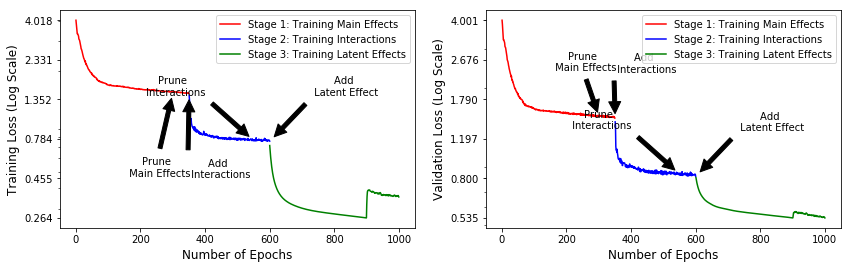

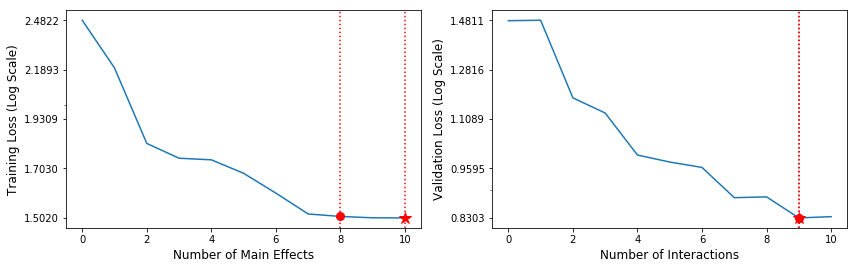

In [7]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

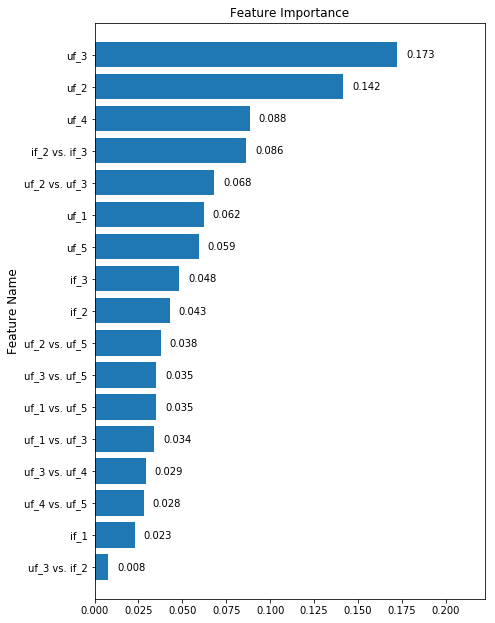

In [8]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

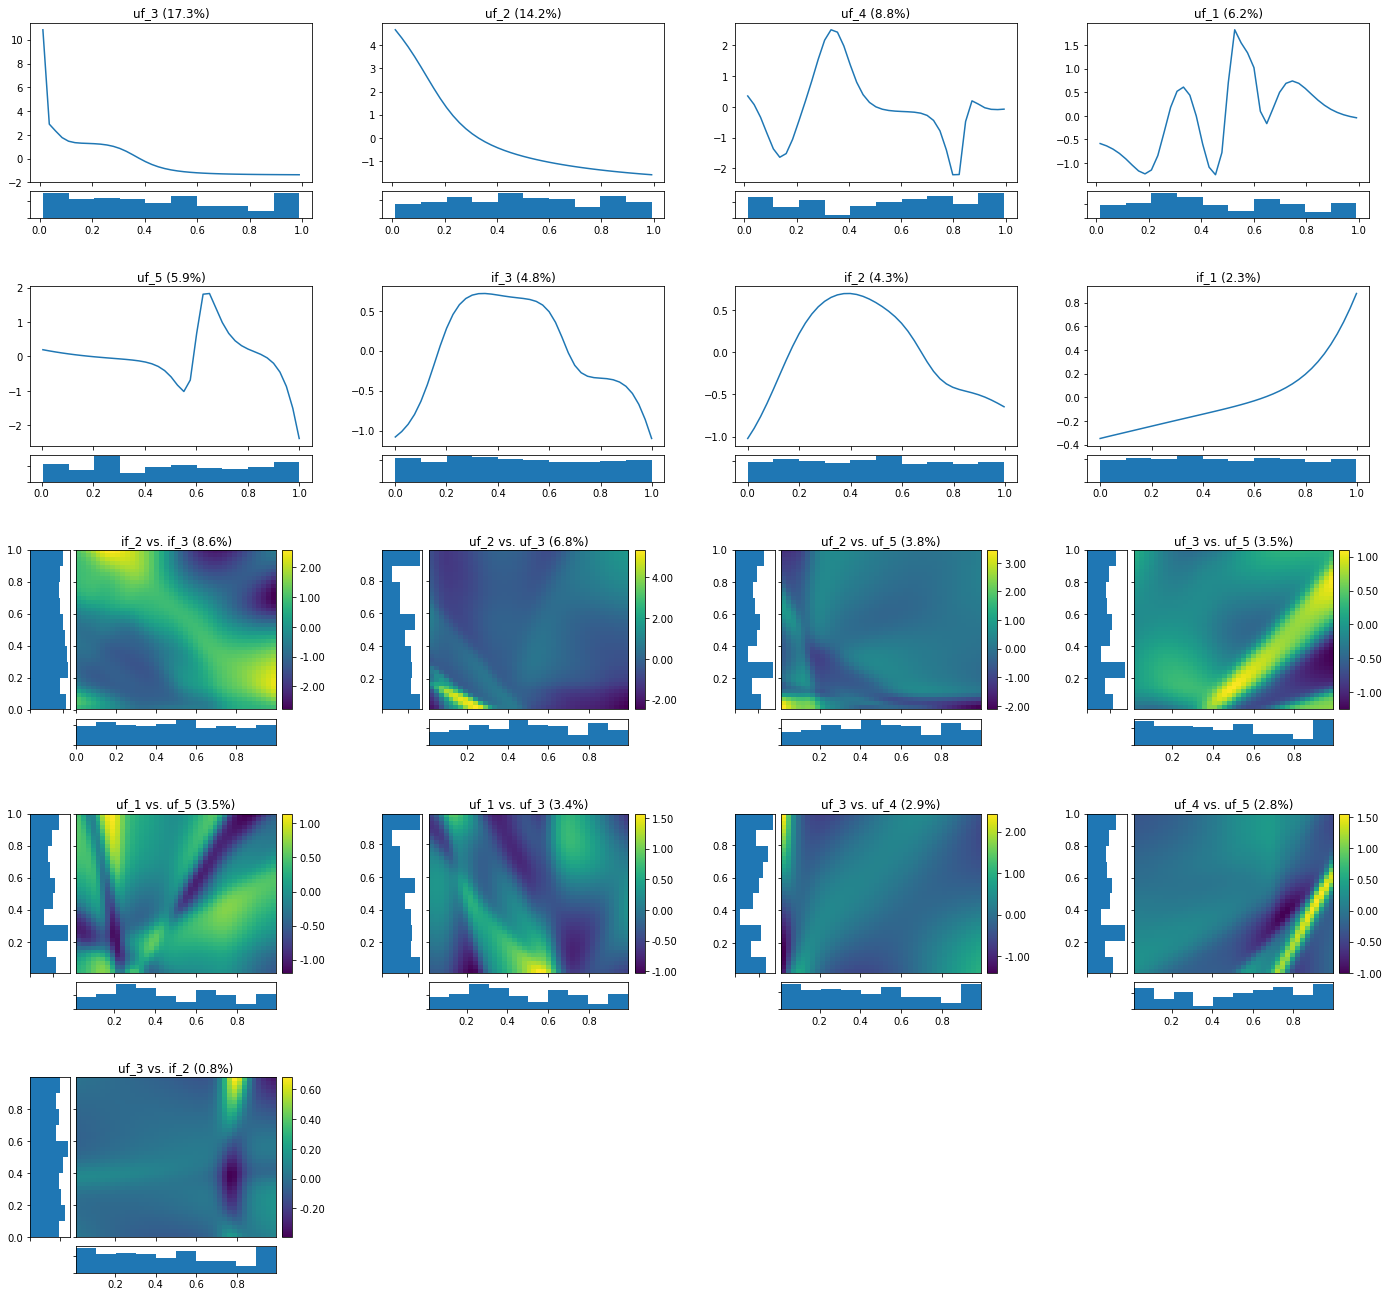

In [9]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')

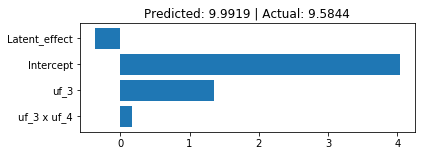

In [10]:
data_dict_local = model.local_explain(0,10,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=True, folder=simu_dir, name='s1_local')

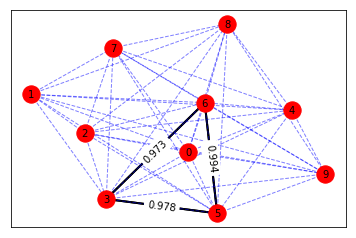

In [11]:
model.mf_distance(0.97,'user')

In [12]:
new = te_x[100,:5].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group [1]
 mean is [ 0.08291791 -0.0934941   0.02991648] and std is [0.02912242 0.07084803 0.10787827]
 the confidence interval is [[ 0.02583797 -0.23235624 -0.18152493],[0.13999784 0.04536804 0.24135789]]


## Binary Classification

In [13]:
import time
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from lvxnn.LVXNN import LV_XNN
from sklearn.metrics.pairwise import cosine_similarity
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization
from sklearn.linear_model import LinearRegression
from lvxnn.DataReader import data_initialize
from collections import OrderedDict

In [15]:
data= pd.read_csv('data/simulation/sim_binary_0.9_2.csv')
train , test = train_test_split(data,test_size=0.2)

#list1 = data.columns
meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
#meta_info['Occupation']={"type":"categorical"}
#meta_info['Genres']={"type":"categorical"}
#meta_info['Gender']={"type":"categorical"}
#meta_info['Age'] = {"type":"continues"}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


tr_x, tr_Xi, tr_y , te_x , te_Xi, te_y, meta_info, model_info = data_initialize(train,test,meta_info,"Classification")

In [16]:
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=True,
               interaction_epochs=200,main_effect_epochs=300,tuning_epochs=50,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0.5,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=10,i_group_num=20,scale_ratio=0.7,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=20,mf_tuning_iters=40,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20, epsilon=0)

In [17]:
st_time = time.time()
model.fit(tr_x,tr_Xi, tr_y)
ed_time = time.time()

ListWrapper(['uf_1', 'uf_2', 'uf_3', 'uf_4', 'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.68467, val loss: 0.68568
Main effects training epoch: 2, train loss: 0.67924, val loss: 0.68199
Main effects training epoch: 3, train loss: 0.67338, val loss: 0.67707
Main effects training epoch: 4, train loss: 0.66821, val loss: 0.67250
Main effects training epoch: 5, train loss: 0.65776, val loss: 0.66160
Main effects training epoch: 6, train loss: 0.63777, val loss: 0.64162
Main effects training epoch: 7, train loss: 0.59879, val loss: 0.60411
Main effects training epoch: 8, train loss: 0.55794, val loss: 0.56687
Main effects training epoch: 9, train loss: 0.53450, val loss: 0.54457
Main effects training epoch: 10, train loss: 0.52365, val loss: 0.53035
Main effects training epoch: 11, train loss: 0.51986, val loss: 0.52795
M

Main effects training epoch: 118, train loss: 0.51257, val loss: 0.52695
Main effects training epoch: 119, train loss: 0.51233, val loss: 0.52854
Main effects training epoch: 120, train loss: 0.51239, val loss: 0.52654
Main effects training epoch: 121, train loss: 0.51234, val loss: 0.52844
Main effects training epoch: 122, train loss: 0.51203, val loss: 0.52714
Main effects training epoch: 123, train loss: 0.51208, val loss: 0.52853
Main effects training epoch: 124, train loss: 0.51197, val loss: 0.52725
Main effects training epoch: 125, train loss: 0.51209, val loss: 0.52778
Main effects training epoch: 126, train loss: 0.51259, val loss: 0.52780
Main effects training epoch: 127, train loss: 0.51190, val loss: 0.52845
Main effects training epoch: 128, train loss: 0.51204, val loss: 0.52593
Main effects training epoch: 129, train loss: 0.51217, val loss: 0.52806
Main effects training epoch: 130, train loss: 0.51203, val loss: 0.52722
Main effects training epoch: 131, train loss: 0.512

Interaction training epoch: 35, train loss: 0.27092, val loss: 0.30518
Interaction training epoch: 36, train loss: 0.26776, val loss: 0.30027
Interaction training epoch: 37, train loss: 0.26397, val loss: 0.29795
Interaction training epoch: 38, train loss: 0.26858, val loss: 0.30220
Interaction training epoch: 39, train loss: 0.26607, val loss: 0.29920
Interaction training epoch: 40, train loss: 0.26249, val loss: 0.29335
Interaction training epoch: 41, train loss: 0.26865, val loss: 0.30048
Interaction training epoch: 42, train loss: 0.26423, val loss: 0.30156
Interaction training epoch: 43, train loss: 0.26450, val loss: 0.29728
Interaction training epoch: 44, train loss: 0.26253, val loss: 0.29851
Interaction training epoch: 45, train loss: 0.26354, val loss: 0.30139
Interaction training epoch: 46, train loss: 0.26094, val loss: 0.29501
Interaction training epoch: 47, train loss: 0.26156, val loss: 0.29915
Interaction training epoch: 48, train loss: 0.26074, val loss: 0.29589
Intera

Interaction training epoch: 154, train loss: 0.23574, val loss: 0.29644
Interaction training epoch: 155, train loss: 0.23395, val loss: 0.29490
Interaction training epoch: 156, train loss: 0.23434, val loss: 0.29177
Interaction training epoch: 157, train loss: 0.23376, val loss: 0.29383
Interaction training epoch: 158, train loss: 0.23498, val loss: 0.29314
Interaction training epoch: 159, train loss: 0.23165, val loss: 0.29169
Interaction training epoch: 160, train loss: 0.23204, val loss: 0.29194
Interaction training epoch: 161, train loss: 0.23356, val loss: 0.29365
Interaction training epoch: 162, train loss: 0.23146, val loss: 0.29147
Interaction training epoch: 163, train loss: 0.23421, val loss: 0.29612
Interaction training epoch: 164, train loss: 0.23327, val loss: 0.29112
Interaction training epoch: 165, train loss: 0.23382, val loss: 0.29614
Interaction training epoch: 166, train loss: 0.23317, val loss: 0.29426
Interaction training epoch: 167, train loss: 0.23325, val loss: 

[SoftImpute] Iter 16: observed BCE=0.114482 validation BCE=0.412721,rank=3
[SoftImpute] Iter 17: observed BCE=0.112192 validation BCE=0.426314,rank=3
[SoftImpute] Iter 18: observed BCE=0.110098 validation BCE=0.424787,rank=3
[SoftImpute] Iter 19: observed BCE=0.108169 validation BCE=0.449653,rank=3
[SoftImpute] Iter 20: observed BCE=0.106390 validation BCE=0.459646,rank=3
######start tuning######
[SoftImpute] Iter 1: observed BCE=0.164822 validation BCE=0.293272,rank=3
[SoftImpute] Iter 2: observed BCE=0.188672 validation BCE=0.298268,rank=3
[SoftImpute] Iter 3: observed BCE=0.196931 validation BCE=0.288577,rank=3
[SoftImpute] Iter 4: observed BCE=0.198541 validation BCE=0.288576,rank=3
[SoftImpute] Iter 5: observed BCE=0.199240 validation BCE=0.288702,rank=3
[SoftImpute] Iter 6: observed BCE=0.198185 validation BCE=0.288439,rank=3
[SoftImpute] Iter 7: observed BCE=0.198074 validation BCE=0.287749,rank=3
[SoftImpute] Iter 8: observed BCE=0.197824 validation BCE=0.288244,rank=3
[SoftImp

In [18]:
pred = model.predict(te_x, te_Xi)
auc = roc_auc_score(te_y,pred)
print('lvxnn auc:',auc)

lvxnn auc: 0.95656038647343


In [19]:
pred_v = model.final_gam_model.predict(te_x)
auc = roc_auc_score(te_y,pred_v)
print('gami auc:',auc)

gami auc: 0.9490928044749555


In [20]:
model.final_mf_model.best_ratio

0.46875

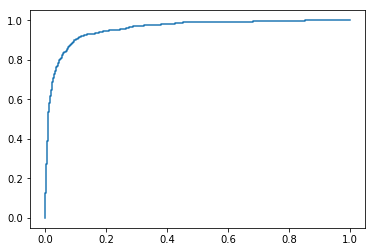

In [21]:
fpr, tpr, thresholds = roc_curve(te_y,pred)
plt.plot(fpr,tpr)

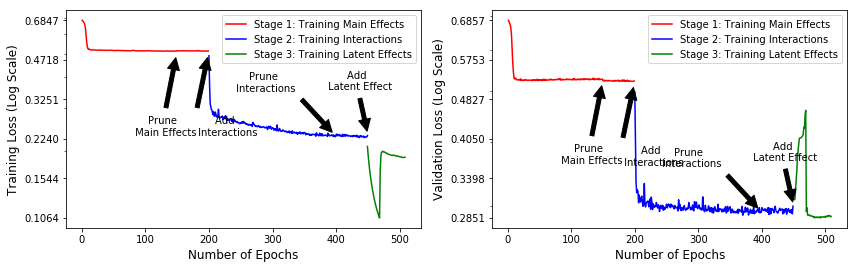

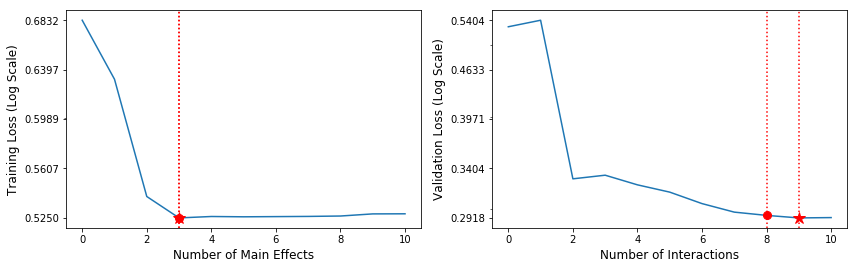

In [22]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

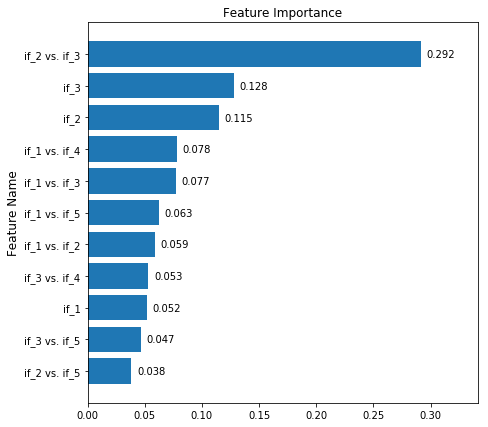

In [23]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

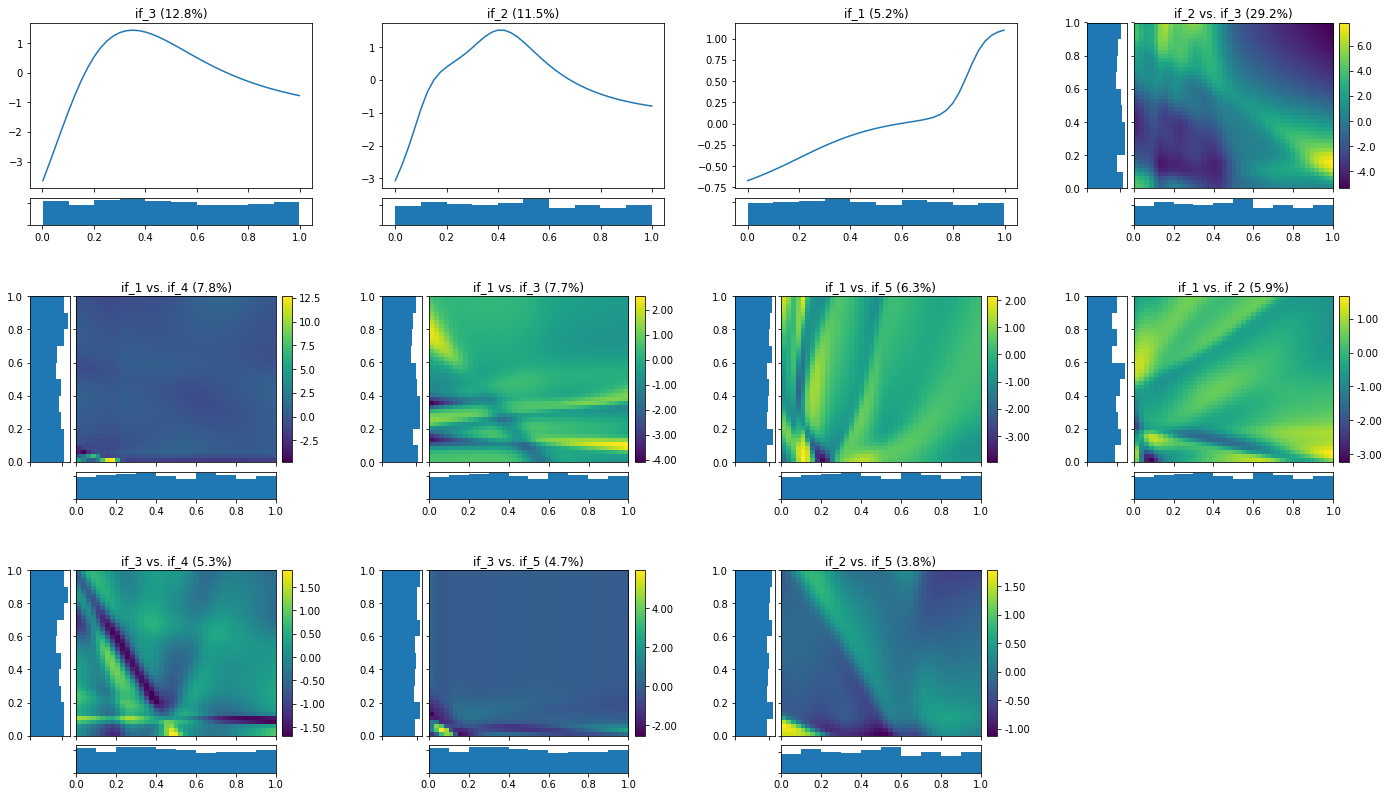

In [24]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')

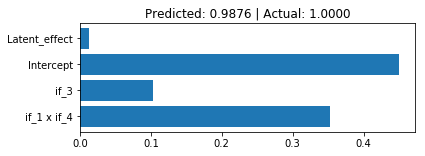

In [25]:
data_dict_local = model.local_explain(0,88,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=True, folder=simu_dir, name='s1_local')

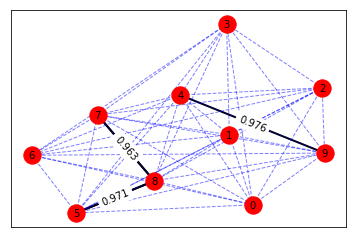

In [26]:
model.mf_distance(0.95,'user')

In [27]:
new = te_x[100,:5].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group [9]
 mean is [ 0.09308339  0.01542776 -0.04360933] and std is [0.01678255 0.07056168 0.0828846 ]
 the confidence interval is [[ 0.0601896  -0.12287313 -0.20606315],[0.12597718 0.15372865 0.1188445 ]]
